[[483  39  56  36  22  31  26  58 176  73]
 [ 56 487  22  32  23  32  39  55  87 167]
 [114  51 267  85 120  82 144  66  47  24]
 [ 41  59  97 268  53 181 141  42  46  72]
 [ 56  27 130  56 310  96 154 115  31  25]
 [ 47  52  85 168  87 329  89  73  41  29]
 [ 13  33  71 119 101  81 487  42  19  34]
 [ 45  47  62  46  93  80  53 451  42  81]
 [179  60  20  28  12  44  13  21 515 108]
 [ 77 177  19  19  17  33  45  49 100 464]]
Accuracy: 0.4061


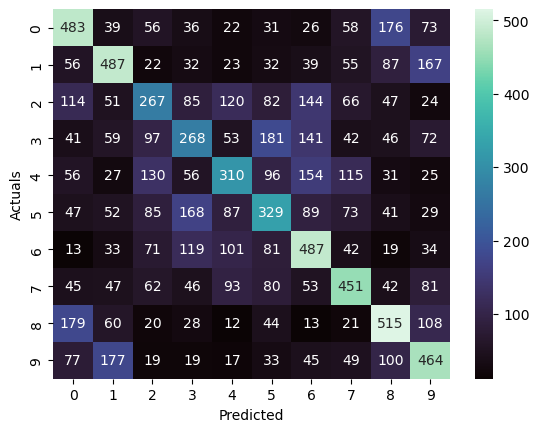

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

from keras.datasets import cifar10

# Load dataset
(c_x_train, c_y_train), (c_x_test, c_y_test) = cifar10.load_data()
# summarize loaded dataset
# print('Train: X=%s, y=%s' % (c_x_train.shape, c_y_train.shape))
# print('Test: X=%s, y=%s' % (c_x_test.shape, c_y_test.shape))
# Plot first few images
# for i in range(9):
#     # Define subplot
#     plt.subplot(330 + 1 + i)
#     # Plot raw pixel data
#     plt.imshow(c_x_train[i])
# # Show the figure
# plt.show()

from scipy.ndimage import rotate

# Assuming c_x_train is the original dataset and y_train is the original label array
rotated_images = []

# Generate rotated images and store them in the rotated_images list
for angle in range(-2, 2, 2):
    rotated_images.append(rotate(c_x_train, angle, axes=(1, 2), reshape=False))

# Convert the rotated_images list to a numpy array
rotated_images = np.array(rotated_images)

# Concatenate the original dataset with the rotated images array
c_x_train = np.concatenate([c_x_train] + list(rotated_images))

# Calculate the number of rotated images
num_rotated_images = rotated_images.shape[0]

# Repeat the original label array num_rotated_images times
y_train_rotated = np.concatenate([c_y_train] * num_rotated_images)

# Concatenate the original label array with the repeated label array
c_y_train = np.concatenate([c_y_train, y_train_rotated])

# Print the new dataset size
# print("X training set size:", c_x_train.shape[0])
# print("Y training set size:", c_y_train.shape[0])

c_x_train = c_x_train.reshape(-1, 32 * 32 * 3)
c_x_test = c_x_test.reshape(-1, 32 * 32 * 3)

c_x_train = c_x_train.astype('float32') / 255.0
c_x_test = c_x_test.astype('float32') / 255.0

# c_y_train = to_categorical(c_y_train)
# c_y_test = to_categorical(c_y_test)
# print(c_x_train.shape)
# print(c_x_test.shape)
# print(c_y_train.shape)

# m_logisitic_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=2.0)
m_logisitic_reg = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', C=2.0)
m_logisitic_reg.fit(c_x_train, c_y_train)

# Predict the test data.
test_pred2 = m_logisitic_reg.predict(c_x_test)

cm2 = confusion_matrix(c_y_test, test_pred2)
print(cm2)

# Now we evaluate the model using confusion matrix for this test dataset
sns.heatmap(cm2, annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')

accuracy1 = accuracy_score(c_y_test, test_pred2)
print("Accuracy:", accuracy1)

labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
from scipy.ndimage import rotate

# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Plot first few images
for i in range(9):
    # Define subplot
    plt.subplot(330 + 1 + i)
    # Plot raw pixel data
    plt.imshow(x_train[i])
# Show the figure
plt.show()

# Assuming c_x_train is the original dataset and y_train is the original label array
rotated_images = []

# Generate rotated images and store them in the rotated_images list
for angle in range(-2, 2, 2):
    print('angle', angle)
    rotated_images.append(rotate(x_train, angle, axes=(1, 2), reshape=False))

# Convert the rotated_images list to a numpy array
rotated_images = np.array(rotated_images)
print(rotated_images.shape)
# Concatenate the original dataset with the rotated images array
x_train = np.concatenate([x_train] + list(rotated_images))

# Calculate the number of rotated images
num_rotated_images = rotated_images.shape[0]
# Repeat the original label array num_rotated_images times
y_train_rotated = np.concatenate([y_train] * num_rotated_images)
print(y_train_rotated)
# Concatenate the original label array with the repeated label array
y_train = np.concatenate([y_train, y_train_rotated])
print(y_train.shape)

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

m_logisitic_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=2.0)
# m_logisitic_reg = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', C=1.0)
m_logisitic_reg.fit(x_train, y_train)

# Predict the test data.
y_test_pred = m_logisitic_reg.predict(x_test)

cm1 = confusion_matrix(y_test, y_test_pred)
print(cm1)

# Now we evaluate the model using confusion matrix for this test dataset
sns.heatmap(cm1, annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

labels = ['Tees','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag', 'Ankle boots']